<a href="https://colab.research.google.com/github/Mbigdeli2003/Deep-Learning/blob/main/DNN_HW2_Q3_Morteza_Bigdeli.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DNN HW2 Morteza Bigdeli 40261662001

In [3]:
import torch
import torch.nn as nn
import torchvision
from torch.utils.data import DataLoader, TensorDataset
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from keras.datasets import mnist
import numpy as np
import torch.optim as optim

## Logistic Regression training with Softmax

11490434/11490434 [==============================] - 0s 0us/step


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1511: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


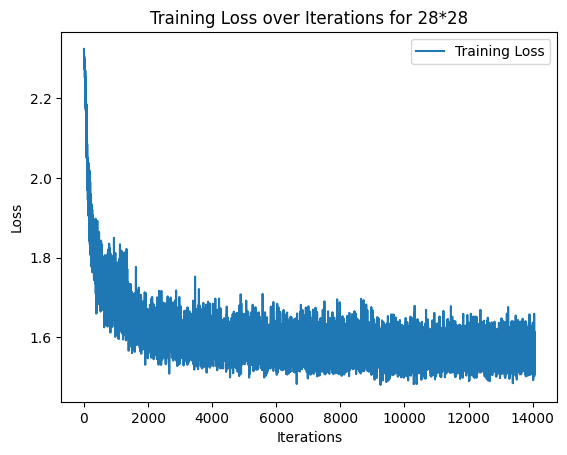

Test Error for 28*28: %8.07


In [3]:
#### Loading data and preprocess
(images, labels), (test_X, test_y) = mnist.load_data()
images = torch.from_numpy(images).to(torch.float32)
labels = torch.from_numpy(labels).to(torch.int64)
test_x = torch.from_numpy(test_X).to(torch.float32)
test_Y = torch.from_numpy(test_y).to(torch.int64)
mean = torch.mean(images)
std = torch.std(images)
images = (images-mean)/std
test_x = (test_x-mean)/std
###########train model###########
input_features = 28*28
output_features = 10
model = nn.Sequential(nn.Linear(in_features=input_features, out_features=output_features),
                      nn.Softmax())
loss_fn = nn.CrossEntropyLoss()
train_dataset = TensorDataset(images, labels)
test_dataset = TensorDataset(test_x, test_Y)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=True)
# Training the model
num_epochs = 15
total_step = len(train_loader)
learning_rate = 0.01

loss_values = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, 28*28)
        outputs = model(images)
        loss = loss_fn(outputs, labels)

        model.zero_grad()
        loss.backward()
        with torch.no_grad():
            for param in model.parameters():
                param-=learning_rate*param.grad

        # Append loss for plotting
        loss_values.append(loss.item())


plt.plot(loss_values, label='Training Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training Loss over Iterations for 28*28')
plt.legend()
plt.show()

# Evaluate the model on the test data
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for test_x, test_Y in test_loader:
        outputs = model(test_x.view(test_x.size(0), -1))
        _, predicted = torch.max(outputs.data, 1)
        total += test_Y.size(0)
        correct += (predicted == test_Y).sum().item()

test_error = (1 - correct / total)*100
print(f'Test Error for 28*28: %{test_error}')

## MLP with 64 sigmoid neurons and softmax for output

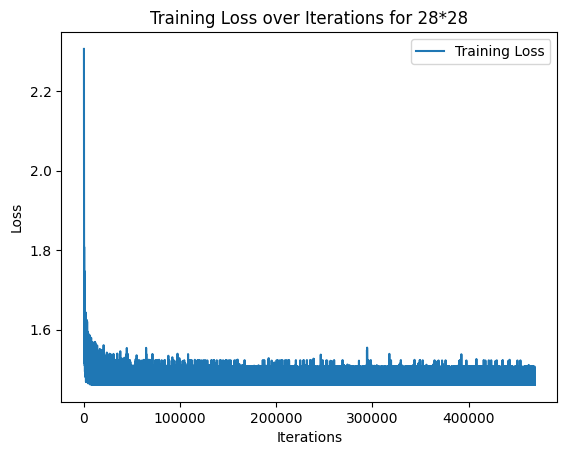

Test Error for 28*28: %3.269999999999995


In [13]:
#### Loading data and preprocess
(images, labels), (test_X, test_y) = mnist.load_data()
images = torch.from_numpy(images).to(torch.float32)
labels = torch.from_numpy(labels).to(torch.int64)
test_x = torch.from_numpy(test_X).to(torch.float32)
test_Y = torch.from_numpy(test_y).to(torch.int64)
mean = torch.mean(images)
std = torch.std(images)
images = (images-mean)/std
test_x = (test_x-mean)/std
###########train model###########
input_features = 28*28
output_features = 10
model= torch.nn.Sequential(
    torch.nn.Linear(input_features, 64),
    torch.nn.Sigmoid(),
    torch.nn.Linear(64, output_features),
    torch.nn.Softmax(dim=1)
)
train_dataset = TensorDataset(images, labels)
test_dataset = TensorDataset(test_x, test_Y)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=True)
# Training the model
num_epochs = 500
total_step = len(train_loader)
# Define the loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_values = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, 28*28)
        outputs = model(images)
        loss= loss_fn(outputs, labels)

# Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Track loss values for plotting
        loss_values.append(loss.item())
        # Append loss for plotting


plt.plot(loss_values, label='Training Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training Loss over Iterations for 28*28')
plt.legend()
plt.show()

# Evaluate the model on the test data
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for test_x, test_Y in test_loader:
        outputs = model(test_x.view(test_x.size(0), -1))
        _, predicted = torch.max(outputs.data, 1)
        total += test_Y.size(0)
        correct += (predicted == test_Y).sum().item()

test_error = (1 - correct / total)*100
print(f'Test Error for 28*28: %{test_error}')

## MLP with 64 Tanh neurons and softmax for output

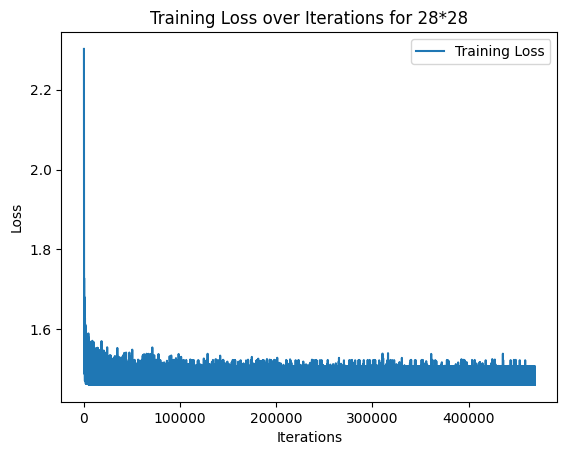

Test Error for 28*28: %3.1499999999999972


In [14]:
#### Loading data and preprocess
(images, labels), (test_X, test_y) = mnist.load_data()
images = torch.from_numpy(images).to(torch.float32)
labels = torch.from_numpy(labels).to(torch.int64)
test_x = torch.from_numpy(test_X).to(torch.float32)
test_Y = torch.from_numpy(test_y).to(torch.int64)
mean = torch.mean(images)
std = torch.std(images)
images = (images-mean)/std
test_x = (test_x-mean)/std
###########train model###########
input_features = 28*28
output_features = 10
model= torch.nn.Sequential(
    torch.nn.Linear(input_features, 64),
    torch.nn.Tanh(),
    torch.nn.Linear(64, output_features),
    torch.nn.Softmax(dim=1)
)
train_dataset = TensorDataset(images, labels)
test_dataset = TensorDataset(test_x, test_Y)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=True)
# Training the model
num_epochs = 500
total_step = len(train_loader)
# Define the loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_values = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, 28*28)
        outputs = model(images)
        loss= loss_fn(outputs, labels)

# Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Track loss values for plotting
        loss_values.append(loss.item())
        # Append loss for plotting


plt.plot(loss_values, label='Training Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training Loss over Iterations for 28*28')
plt.legend()
plt.show()

# Evaluate the model on the test data
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for test_x, test_Y in test_loader:
        outputs = model(test_x.view(test_x.size(0), -1))
        _, predicted = torch.max(outputs.data, 1)
        total += test_Y.size(0)
        correct += (predicted == test_Y).sum().item()

test_error = (1 - correct / total)*100
print(f'Test Error for 28*28: %{test_error}')

## MLP with 64 ReLU neurons and softmax for output

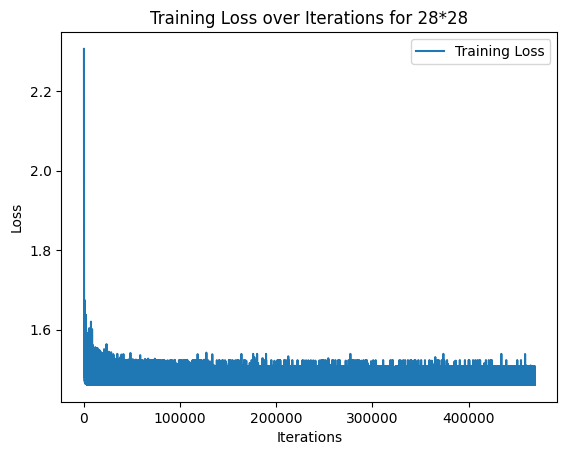

Test Error for 28*28: %2.7000000000000024


In [15]:
#### Loading data and preprocess
(images, labels), (test_X, test_y) = mnist.load_data()
(images, labels), (test_X, test_y) = mnist.load_data()
images = torch.from_numpy(images).to(torch.float32)
labels = torch.from_numpy(labels).to(torch.int64)
test_x = torch.from_numpy(test_X).to(torch.float32)
test_Y = torch.from_numpy(test_y).to(torch.int64)
mean = torch.mean(images)
std = torch.std(images)
images = (images-mean)/std
test_x = (test_x-mean)/std
###########train model###########
input_features = 28*28
output_features = 10
model= torch.nn.Sequential(
    torch.nn.Linear(input_features, 64),
    torch.nn.ReLU(),
    torch.nn.Linear(64, output_features),
    torch.nn.Softmax(dim=1)
)
train_dataset = TensorDataset(images, labels)
test_dataset = TensorDataset(test_x, test_Y)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=True)
# Training the model
num_epochs = 500
total_step = len(train_loader)
# Define the loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_values = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, 28*28)
        outputs = model(images)
        loss= loss_fn(outputs, labels)

# Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Track loss values for plotting
        loss_values.append(loss.item())
        # Append loss for plotting


plt.plot(loss_values, label='Training Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training Loss over Iterations for 28*28')
plt.legend()
plt.show()

# Evaluate the model on the test data
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for test_x, test_Y in test_loader:
        outputs = model(test_x.view(test_x.size(0), -1))
        _, predicted = torch.max(outputs.data, 1)
        total += test_Y.size(0)
        correct += (predicted == test_Y).sum().item()

test_error = (1 - correct / total)*100
print(f'Test Error for 28*28: %{test_error}')

## MLP with 64 Leaky Relu with c=0.01 neurons   and softmax for output

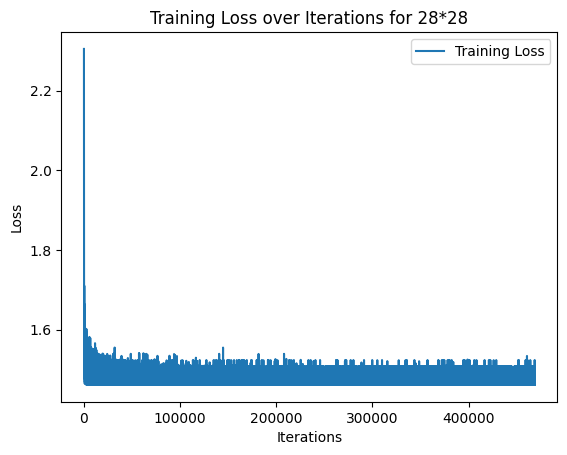

Test Error for 28*28: %2.2399999999999975


In [16]:
#### Loading data and preprocess
(images, labels), (test_X, test_y) = mnist.load_data()
(images, labels), (test_X, test_y) = mnist.load_data()
images = torch.from_numpy(images).to(torch.float32)
labels = torch.from_numpy(labels).to(torch.int64)
test_x = torch.from_numpy(test_X).to(torch.float32)
test_Y = torch.from_numpy(test_y).to(torch.int64)
mean = torch.mean(images)
std = torch.std(images)
images = (images-mean)/std
test_x = (test_x-mean)/std
###########train model###########
input_features = 28*28
output_features = 10
model= torch.nn.Sequential(
    torch.nn.Linear(input_features, 64),
    torch.nn.LeakyReLU(0.01),
    torch.nn.Linear(64, output_features),
    torch.nn.Softmax()
)
train_dataset = TensorDataset(images, labels)
test_dataset = TensorDataset(test_x, test_Y)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=True)
# Training the model
num_epochs = 500
total_step = len(train_loader)
# Define the loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_values = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, 28*28)
        outputs = model(images)
        loss= loss_fn(outputs, labels)

# Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Track loss values for plotting
        loss_values.append(loss.item())
        # Append loss for plotting


plt.plot(loss_values, label='Training Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training Loss over Iterations for 28*28')
plt.legend()
plt.show()

# Evaluate the model on the test data
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for test_x, test_Y in test_loader:
        outputs = model(test_x.view(test_x.size(0), -1))
        _, predicted = torch.max(outputs.data, 1)
        total += test_Y.size(0)
        correct += (predicted == test_Y).sum().item()

test_error = (1 - correct / total)*100
print(f'Test Error for 28*28: %{test_error}')

## MLP with Relu with 64 neurons and softmax for output **best learning rate**



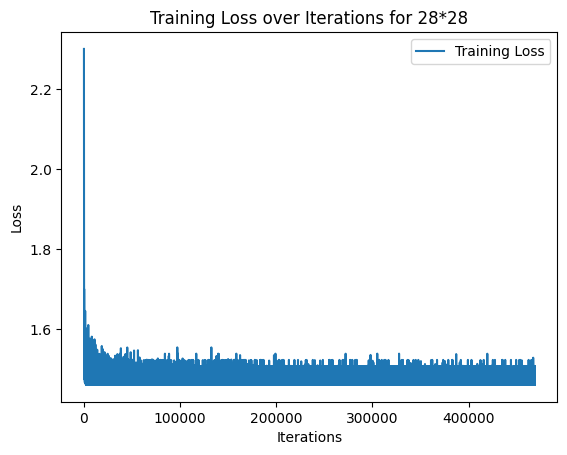

Test Error for 28*28: %2.649999999999997


In [17]:
#### Loading data and preprocess
(images, labels), (test_X, test_y) = mnist.load_data()
(images, labels), (test_X, test_y) = mnist.load_data()
images = torch.from_numpy(images).to(torch.float32)
labels = torch.from_numpy(labels).to(torch.int64)
test_x = torch.from_numpy(test_X).to(torch.float32)
test_Y = torch.from_numpy(test_y).to(torch.int64)
mean = torch.mean(images)
std = torch.std(images)
images = (images-mean)/std
test_x = (test_x-mean)/std
###########train model###########
input_features = 28*28
output_features = 10
model= torch.nn.Sequential(
    torch.nn.Linear(input_features, 64),
    torch.nn.ReLU(),
    torch.nn.Linear(64, output_features),
    torch.nn.Softmax()
)
train_dataset = TensorDataset(images, labels)
test_dataset = TensorDataset(test_x, test_Y)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=True)
# Training the model
num_epochs = 500
total_step = len(train_loader)
# Define the loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_values = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, 28*28)
        outputs = model(images)
        loss= loss_fn(outputs, labels)

# Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Track loss values for plotting
        loss_values.append(loss.item())
        # Append loss for plotting


plt.plot(loss_values, label='Training Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training Loss over Iterations for 28*28')
plt.legend()
plt.show()

# Evaluate the model on the test data
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for test_x, test_Y in test_loader:
        outputs = model(test_x.view(test_x.size(0), -1))
        _, predicted = torch.max(outputs.data, 1)
        total += test_Y.size(0)
        correct += (predicted == test_Y).sum().item()

test_error = (1 - correct / total)*100
print(f'Test Error for 28*28: %{test_error}')

##Three-layer MLP with ReLU
but with with less number of neurons  in the hidden
layers (for instnce try 32 neurons in the second layer
and 24 neurons in the third layer)

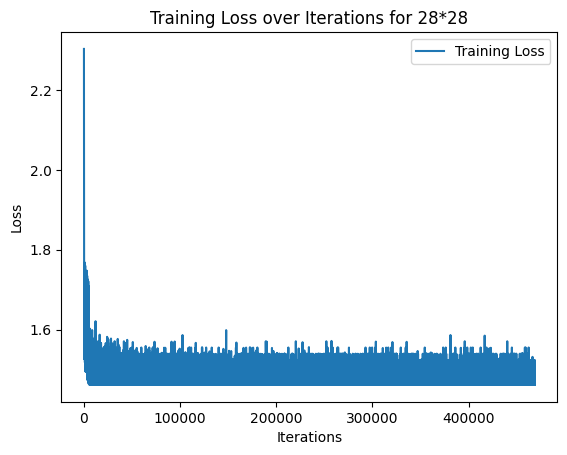

Test Error for 28*28: %3.2499999999999973


In [18]:
#### Loading data and preprocess
(images, labels), (test_X, test_y) = mnist.load_data()
images = torch.from_numpy(images).to(torch.float32)
labels = torch.from_numpy(labels).to(torch.int64)
test_x = torch.from_numpy(test_X).to(torch.float32)
test_Y = torch.from_numpy(test_y).to(torch.int64)
mean = torch.mean(images)
std = torch.std(images)
images = (images-mean)/std
test_x = (test_x-mean)/std
###########train model###########
input_features = 28*28
output_features = 10
model= torch.nn.Sequential(
    torch.nn.Linear(input_features, 32),
    torch.nn.ReLU(),torch.nn.Linear(32,24),
    torch.nn.ReLU(),
    torch.nn.Linear(24, output_features),
    torch.nn.Softmax(dim=1))
train_dataset = TensorDataset(images, labels)
test_dataset = TensorDataset(test_x, test_Y)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=True)
# Training the model
num_epochs = 500
total_step = len(train_loader)
# Define the loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_values = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, 28*28)
        outputs = model(images)
        loss= loss_fn(outputs, labels)

# Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Track loss values for plotting
        loss_values.append(loss.item())
        # Append loss for plotting


plt.plot(loss_values, label='Training Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training Loss over Iterations for 28*28')
plt.legend()
plt.show()

# Evaluate the model on the test data
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for test_x, test_Y in test_loader:
        outputs = model(test_x.view(test_x.size(0), -1))
        _, predicted = torch.max(outputs.data, 1)
        total += test_Y.size(0)
        correct += (predicted == test_Y).sum().item()

test_error = (1 - correct / total)*100
print(f'Test Error for 28*28: %{test_error}')

##Three-layer MLP with sigmoid
but with with less number of neurons  in the hidden
layers (for instnce try 32 neurons in the second layer
and 24 neurons in the third layer)

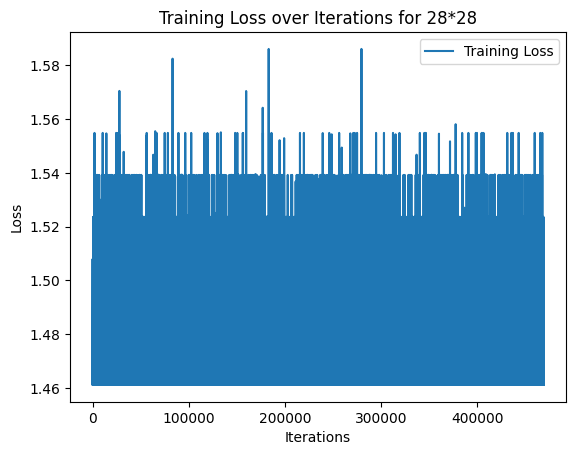

Test Error for 28*28: %3.0100000000000016


In [19]:
#### Loading data and preprocess
(images, labels), (test_X, test_y) = mnist.load_data()
(images, labels), (test_X, test_y) = mnist.load_data()
images = torch.from_numpy(images).to(torch.float32)
labels = torch.from_numpy(labels).to(torch.int64)
test_x = torch.from_numpy(test_X).to(torch.float32)
test_Y = torch.from_numpy(test_y).to(torch.int64)
mean = torch.mean(images)
std = torch.std(images)
images = (images-mean)/std
test_x = (test_x-mean)/std
###########train model###########
input_features = 28*28
output_features = 10
torch.nn.Sequential(
    torch.nn.Linear(input_features, 32),
    torch.nn.Sigmoid(),
    torch.nn.Linear(32, 24),
    torch.nn.Sigmoid(),
    torch.nn.Linear(24, output_features),
    torch.nn.Softmax(dim=1)
)
train_dataset = TensorDataset(images, labels)
test_dataset = TensorDataset(test_x, test_Y)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=True)
# Training the model
num_epochs = 500
total_step = len(train_loader)
# Define the loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_values = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, 28*28)
        outputs = model(images)
        loss= loss_fn(outputs, labels)

# Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Track loss values for plotting
        loss_values.append(loss.item())
        # Append loss for plotting


plt.plot(loss_values, label='Training Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training Loss over Iterations for 28*28')
plt.legend()
plt.show()

# Evaluate the model on the test data
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for test_x, test_Y in test_loader:
        outputs = model(test_x.view(test_x.size(0), -1))
        _, predicted = torch.max(outputs.data, 1)
        total += test_Y.size(0)
        correct += (predicted == test_Y).sum().item()

test_error = (1 - correct / total)*100
print(f'Test Error for 28*28: %{test_error}')

##MLP with one hidden layer 32 ReLU for hidden layer and soft max for output

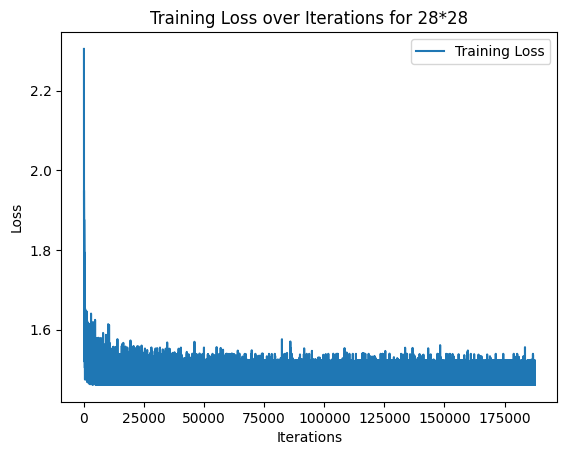

Test Error for 28*28: %3.3299999999999996


In [20]:
#### Loading data and preprocess
(images, labels), (test_X, test_y) = mnist.load_data()
(images, labels), (test_X, test_y) = mnist.load_data()
images = torch.from_numpy(images).to(torch.float32)
labels = torch.from_numpy(labels).to(torch.int64)
test_x = torch.from_numpy(test_X).to(torch.float32)
test_Y = torch.from_numpy(test_y).to(torch.int64)
mean = torch.mean(images)
std = torch.std(images)
images = (images-mean)/std
test_x = (test_x-mean)/std
###########train model###########
input_features = 28*28
output_features = 10
model= torch.nn.Sequential(
    torch.nn.Linear(input_features, 32),
    torch.nn.ReLU(),
    torch.nn.Linear(32, output_features),
    torch.nn.Softmax()
)
train_dataset = TensorDataset(images, labels)
test_dataset = TensorDataset(test_x, test_Y)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=True)
# Training the model
num_epochs = 200
total_step = len(train_loader)
# Define the loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_values = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, 28*28)
        outputs = model(images)
        loss= loss_fn(outputs, labels)

# Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Track loss values for plotting
        loss_values.append(loss.item())
        # Append loss for plotting


plt.plot(loss_values, label='Training Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training Loss over Iterations for 28*28')
plt.legend()
plt.show()

# Evaluate the model on the test data
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for test_x, test_Y in test_loader:
        outputs = model(test_x.view(test_x.size(0), -1))
        _, predicted = torch.max(outputs.data, 1)
        total += test_Y.size(0)
        correct += (predicted == test_Y).sum().item()

test_error = (1 - correct / total)*100
print(f'Test Error for 28*28: %{test_error}')

##MLP with one hidden layer 64 Sigmoid for hidden layer and soft max for output

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1511: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


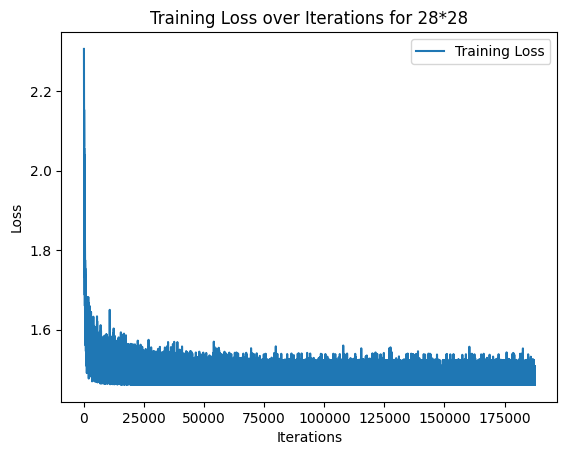

Test Error for 28*28: %4.449999999999998


In [10]:
#### Loading data and preprocess
(images, labels), (test_X, test_y) = mnist.load_data()
images = torch.from_numpy(images).to(torch.float32)
labels = torch.from_numpy(labels).to(torch.int64)
test_x = torch.from_numpy(test_X).to(torch.float32)
test_Y = torch.from_numpy(test_y).to(torch.int64)
mean = torch.mean(images)
std = torch.std(images)
images = (images-mean)/std
test_x = (test_x-mean)/std
device = torch.device("cuda:0")
model.to(device)
device = torch.device("cuda:0")
###########train model###########
input_features = 28*28
output_features = 10
model= torch.nn.Sequential(
    torch.nn.Linear(input_features, 32),
    torch.nn.Sigmoid(),
    torch.nn.Linear(32, output_features),
    torch.nn.Softmax()
)
train_dataset = TensorDataset(images, labels)
test_dataset = TensorDataset(test_x, test_Y)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=True)
# Training the model
num_epochs = 200
total_step = len(train_loader)
# Define the loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
# optimizer.to(device)
loss_values = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, 28*28)
        outputs = model(images)
        loss= loss_fn(outputs, labels)

# Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Track loss values for plotting
        loss_values.append(loss.item())
        # Append loss for plotting


plt.plot(loss_values, label='Training Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training Loss over Iterations for 28*28')
plt.legend()
plt.show()

# Evaluate the model on the test data
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for test_x, test_Y in test_loader:
        outputs = model(test_x.view(test_x.size(0), -1))
        _, predicted = torch.max(outputs.data, 1)
        total += test_Y.size(0)
        correct += (predicted == test_Y).sum().item()

test_error = (1 - correct / total)*100
print(f'Test Error for 28*28: %{test_error}')

##MLP with one hidden layer 64 ReLU for hidden layer and soft max for output

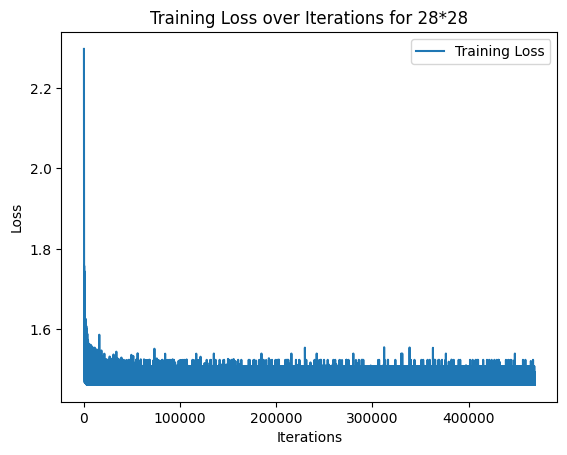

Test Error for 28*28: %2.3900000000000032


In [11]:
#### Loading data and preprocess
(images, labels), (test_X, test_y) = mnist.load_data()
(images, labels), (test_X, test_y) = mnist.load_data()
images = torch.from_numpy(images).to(torch.float32)
labels = torch.from_numpy(labels).to(torch.int64)
test_x = torch.from_numpy(test_X).to(torch.float32)
test_Y = torch.from_numpy(test_y).to(torch.int64)
mean = torch.mean(images)
std = torch.std(images)
images = (images-mean)/std
test_x = (test_x-mean)/std
device = torch.device("cuda:0")
model.to(device)
device = torch.device("cuda:0")
###########train model###########
input_features = 28*28
output_features = 10
model= torch.nn.Sequential(
    torch.nn.Linear(input_features, 64),
    torch.nn.ReLU(),
    torch.nn.Linear(64, output_features),
    torch.nn.Softmax()
)
train_dataset = TensorDataset(images, labels)
test_dataset = TensorDataset(test_x, test_Y)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=True)
# Training the model
num_epochs = 500
total_step = len(train_loader)
# Define the loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_values = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, 28*28)
        outputs = model(images)
        loss= loss_fn(outputs, labels)

# Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Track loss values for plotting
        loss_values.append(loss.item())
        # Append loss for plotting


plt.plot(loss_values, label='Training Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training Loss over Iterations for 28*28')
plt.legend()
plt.show()

# Evaluate the model on the test data
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for test_x, test_Y in test_loader:
        outputs = model(test_x.view(test_x.size(0), -1))
        _, predicted = torch.max(outputs.data, 1)
        total += test_Y.size(0)
        correct += (predicted == test_Y).sum().item()

test_error = (1 - correct / total)*100
print(f'Test Error for 28*28: %{test_error}')

##MLP with one hidden layer 64 Sigmoid for hidden layer and soft max for output

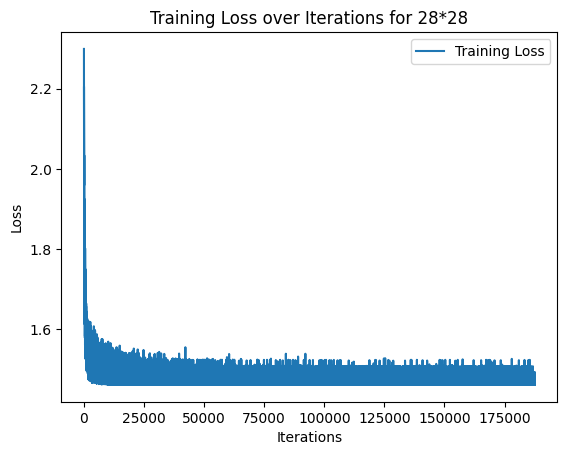

Test Error for 28*28: %3.269999999999995


In [11]:
#### Loading data and preprocess
(images, labels), (test_X, test_y) = mnist.load_data()
(images, labels), (test_X, test_y) = mnist.load_data()
images = torch.from_numpy(images).to(torch.float32)
labels = torch.from_numpy(labels).to(torch.int64)
test_x = torch.from_numpy(test_X).to(torch.float32)
test_Y = torch.from_numpy(test_y).to(torch.int64)
mean = torch.mean(images)
std = torch.std(images)
images = (images-mean)/std
test_x = (test_x-mean)/std
device = torch.device("cuda:0")
model.to(device)
device = torch.device("cuda:0")
###########train model###########
input_features = 28*28
output_features = 10
model= torch.nn.Sequential(
    torch.nn.Linear(input_features, 64),
    torch.nn.Sigmoid(),
    torch.nn.Linear(64, output_features),
    torch.nn.Softmax(dim=1)
)
train_dataset = TensorDataset(images, labels)
test_dataset = TensorDataset(test_x, test_Y)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=True)
# Training the model
num_epochs = 200
total_step = len(train_loader)
# Define the loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_values = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, 28*28)
        outputs = model(images)
        loss= loss_fn(outputs, labels)

# Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Track loss values for plotting
        loss_values.append(loss.item())
        # Append loss for plotting


plt.plot(loss_values, label='Training Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training Loss over Iterations for 28*28')
plt.legend()
plt.show()

# Evaluate the model on the test data
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for test_x, test_Y in test_loader:
        outputs = model(test_x.view(test_x.size(0), -1))
        _, predicted = torch.max(outputs.data, 1)
        total += test_Y.size(0)
        correct += (predicted == test_Y).sum().item()

test_error = (1 - correct / total)*100
print(f'Test Error for 28*28: %{test_error}')

##MLP with one hidden layer 128 with ReLu for hidden layer and softmax for output

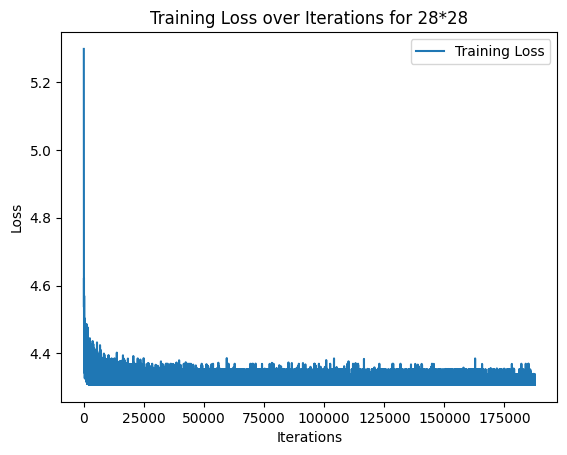

Test Error for 28*28: %2.1499999999999964


In [12]:
#### Loading data and preprocess
(images, labels), (test_X, test_y) = mnist.load_data()
(images, labels), (test_X, test_y) = mnist.load_data()
images = torch.from_numpy(images).to(torch.float32)
labels = torch.from_numpy(labels).to(torch.int64)
test_x = torch.from_numpy(test_X).to(torch.float32)
test_Y = torch.from_numpy(test_y).to(torch.int64)
mean = torch.mean(images)
std = torch.std(images)
images = (images-mean)/std
test_x = (test_x-mean)/std
device = torch.device("cuda:0")
model.to(device)
device = torch.device("cuda:0")
###########train model###########
input_features = 28*28
output_features = 200
model= torch.nn.Sequential(
    torch.nn.Linear(input_features, 128),
    torch.nn.ReLU(),
    torch.nn.Linear(128, output_features),
    torch.nn.Softmax(dim=1)
)
train_dataset = TensorDataset(images, labels)
test_dataset = TensorDataset(test_x, test_Y)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=True)
# Training the model
num_epochs = 200
total_step = len(train_loader)
# Define the loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_values = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, 28*28)
        outputs = model(images)
        loss= loss_fn(outputs, labels)

# Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Track loss values for plotting
        loss_values.append(loss.item())
        # Append loss for plotting


plt.plot(loss_values, label='Training Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training Loss over Iterations for 28*28')
plt.legend()
plt.show()

# Evaluate the model on the test data
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for test_x, test_Y in test_loader:
        outputs = model(test_x.view(test_x.size(0), -1))
        _, predicted = torch.max(outputs.data, 1)
        total += test_Y.size(0)
        correct += (predicted == test_Y).sum().item()

test_error = (1 - correct / total)*100
print(f'Test Error for 28*28: %{test_error}')

##MLP with one hidden layer 128 with Sigmoid for hidden layer and softmax for output

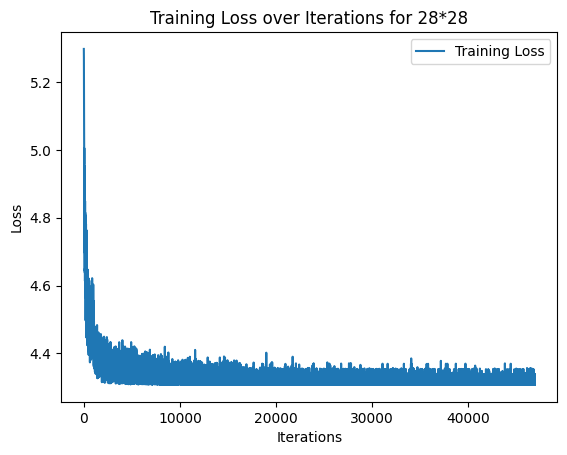

Test Error for 28*28: %2.7000000000000024


In [13]:
#### Loading data and preprocess
(images, labels), (test_X, test_y) = mnist.load_data()
(images, labels), (test_X, test_y) = mnist.load_data()
images = torch.from_numpy(images).to(torch.float32)
labels = torch.from_numpy(labels).to(torch.int64)
test_x = torch.from_numpy(test_X).to(torch.float32)
test_Y = torch.from_numpy(test_y).to(torch.int64)
mean = torch.mean(images)
std = torch.std(images)
images = (images-mean)/std
test_x = (test_x-mean)/std
device = torch.device("cuda:0")
model.to(device)
device = torch.device("cuda:0")
###########train model###########
input_features = 28*28
output_features = 200
model= torch.nn.Sequential(
    torch.nn.Linear(input_features, 128),
    torch.nn.Sigmoid(),
    torch.nn.Linear(128, output_features),
    torch.nn.Softmax(dim=1)
)
train_dataset = TensorDataset(images, labels)
test_dataset = TensorDataset(test_x, test_Y)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=True)
# Training the model
num_epochs = 50
total_step = len(train_loader)
# Define the loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_values = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, 28*28)
        outputs = model(images)
        loss= loss_fn(outputs, labels)

# Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Track loss values for plotting
        loss_values.append(loss.item())
        # Append loss for plotting


plt.plot(loss_values, label='Training Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training Loss over Iterations for 28*28')
plt.legend()
plt.show()

# Evaluate the model on the test data
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for test_x, test_Y in test_loader:
        outputs = model(test_x.view(test_x.size(0), -1))
        _, predicted = torch.max(outputs.data, 1)
        total += test_Y.size(0)
        correct += (predicted == test_Y).sum().item()

test_error = (1 - correct / total)*100
print(f'Test Error for 28*28: %{test_error}')